<a href="https://colab.research.google.com/github/SMN-SENAMHI/MONITOREO/blob/main/ERA5_SURFACE_MONTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q xarray zarr "fsspec<=2025.3.0" "requests==2.32.4"


In [2]:
import xarray as xr

url = "https://data.earthdatahub.destine.eu/public/test-dataset-v0.zarr"

ds = xr.open_dataset(
    url,
    engine="zarr",
    chunks="auto"
)

ds


<xarray.Dataset> Size: 4GB
Dimensions:               (latitude: 720, longitude: 1440,
                           age_band_lower_bound: 14, year: 71)
Coordinates:
  * age_band_lower_bound  (age_band_lower_bound) int64 112B 0 5 10 ... 55 60 65
  * latitude              (latitude) float64 6kB 90.0 89.75 ... -89.5 -89.75
  * longitude             (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
  * year                  (year) int64 568B 1950 1951 1952 ... 2018 2019 2020
Data variables:
    demographic_totals    (latitude, longitude, age_band_lower_bound, year) float32 4GB dask.array<chunksize=(540, 540, 14, 6), meta=np.ndarray>

Data variables:
    demographic_totals  (latitude, longitude, age_band_lower_bound, year) float32 4GB dask.array<chunksize=(540, 540, 14, 6), meta=np.ndarray>


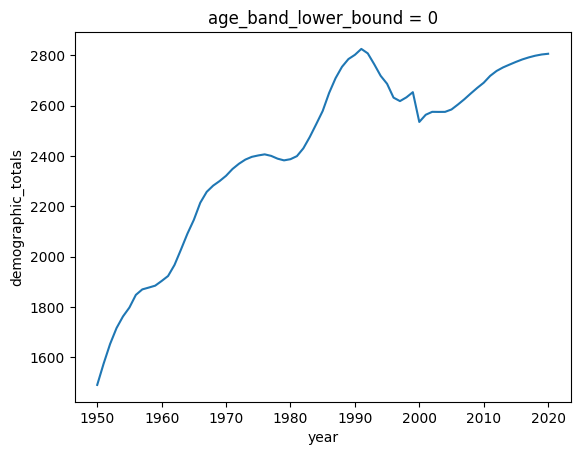

In [4]:
# Variables disponibles
print(ds.data_vars)

# Seleccionar un año y un grupo de edad
ds.sel(year=2000, age_band_lower_bound=25)

# Promedio global en 2010 para edad >= 15
ds.sel(year=2010, age_band_lower_bound=slice(15, 65))["demographic_totals"].mean().compute()

# Serie temporal global para 0-4 años
serie = ds.sel(age_band_lower_bound=0)["demographic_totals"].mean(dim=("latitude","longitude")).compute()
serie.plot()


In [ ]:
#SECCION DE COMENTARIOS

#Registro en el link: https://earthdatahub.destine.eu/getting-started
#Seccion:
#How to obtain an Earth Data Hub personal access token
#To obtain a personal access token you first need to register to the DestinE platform.
#Then you can go to *#Earth Data Hub account settings#* where you can find your default personal access tokens or create others.

#OJO: Usar correo de trabajo (profesional/institucional).
#El Gmail solo sería aceptado si no cuentas con uno institucional, pero no es lo recomendado.

#Email:jllamocca@senamhi.gob.pe
#user:jllamocca
#pass: Senamhi2025*


#Autentificacion
#Ingresar: https://earthdatahub.destine.eu/account-settings

#Tea asignan un ID
#Your user UID is 63203c1e-f1c5-451a-a7ec-48aec91b1ac0

#Cuota
#El límite mensual es de 500 000 solicitudes/mes

#En el mismo lugar
#My personal access tokens
#TOKEN: edh_pat_cfdba8b50c493e84dfc676f5f1efed1794dde11c40cd21237e54c21da72c2f9378c792defeb8e2ca4638ac478df26ab8



#En caso tengas un HPC
# Guardar tu token en el archivo .netrc
with open("$HOME/.netrc", "w") as f:
    f.write("machine data.earthdatahub.destine.eu\n")
    f.write("  password edh_pat_cfdba8b50c493e84dfc676f5f1efed1794dde11c40cd21237e54c21da72c2f9378c792defeb8e2ca4638ac478df26ab8\n")

!chmod 600 $HOME/.netrc


#Se va a Catalogos para el elegir la base de datos: https://earthdatahub.destine.eu/catalogue


In [16]:
# ==============================================
# Guardar token en Colab (.netrc)
# ==============================================

# 👇 Reemplaza con tu token real de EDH (empieza con edh_pat_...)
TOKEN = "edh_pat_cfdba8b50c493e84dfc676f5f1efed1794dde11c40cd21237e54c21da72c2f9378c792defeb8e2ca4638ac478df26ab8"

# Crear el archivo .netrc en /root
with open("/root/.netrc", "w") as f:
    f.write("machine data.earthdatahub.destine.eu\n")
    f.write(f"  password {TOKEN}\n")

# Ajustar permisos (requerido por seguridad)
!chmod 600 /root/.netrc


In [17]:
import xarray as xr

url = "https://data.earthdatahub.destine.eu/era5/reanalysis-era5-single-levels-monthly-means-v0.zarr"

ds = xr.open_dataset(
    url,
    engine="zarr",
    chunks="auto",
    storage_options={"client_kwargs": {"trust_env": True}}
)

print(ds)



<xarray.Dataset> Size: 34GB
Dimensions:     (valid_time: 1027, latitude: 721, longitude: 1440)
Coordinates:
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
    surface     float64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-07-01
Data variables:
    d2m         (valid_time, latitude, longitude) float32 4GB dask.array<chunksize=(120, 256, 256), meta=np.ndarray>
    msl         (valid_time, latitude, longitude) float32 4GB dask.array<chunksize=(120, 256, 256), meta=np.ndarray>
    sp          (valid_time, latitude, longitude) float32 4GB dask.array<chunksize=(120, 256, 256), meta=np.ndarray>
    sst         (valid_time, latitude, longitude) float32 4GB dask.array<chunksize=(120, 256, 256), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 4GB dask.array<chunksize=(120, 256, 256), meta=np.ndarray

In [23]:
import xarray as xr
import pandas as pd

# -----------------------------
# 1. Abrir dataset ERA5
# -----------------------------
url = "https://data.earthdatahub.destine.eu/era5/reanalysis-era5-single-levels-monthly-means-v0.zarr"

ds = xr.open_dataset(
    url,
    engine="zarr",
    chunks="auto",
    storage_options={"client_kwargs": {"trust_env": True}}
)

# -----------------------------
# 2. Variables con unidades y descripción
# -----------------------------
variables = []
for var in ds.data_vars:
    units = ds[var].attrs.get("units", "sin unidades")
    long_name = ds[var].attrs.get("long_name", "sin descripción")
    variables.append([var, units, long_name])

df = pd.DataFrame(variables, columns=["Variable", "Unidades", "Descripción"])
print("Variables disponibles en ERA5:\n")
print(df.to_string(index=False))

# -----------------------------
# 3. Rango temporal del dataset
# -----------------------------
fechas = pd.to_datetime(ds.valid_time.values)
inicio = fechas.min().strftime("%Y-%m")
fin    = fechas.max().strftime("%Y-%m")

print("\n Rango temporal del dataset ERA5:")
print(f"Inicio: {inicio}")
print(f"Fin:    {fin}")
print(f"Total de meses: {len(fechas)}")



Variables disponibles en ERA5:

Variable Unidades                  Descripción
     d2m        K 2 metre dewpoint temperature
     msl       Pa      Mean sea level pressure
      sp       Pa             Surface pressure
     sst        K      Sea surface temperature
     t2m        K          2 metre temperature
      tp        m          Total precipitation
     u10  m s**-1    10 metre U wind component
     v10  m s**-1    10 metre V wind component

 Rango temporal del dataset ERA5:
Inicio: 1940-01
Fin:    2025-07
Total de meses: 1027


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (156 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


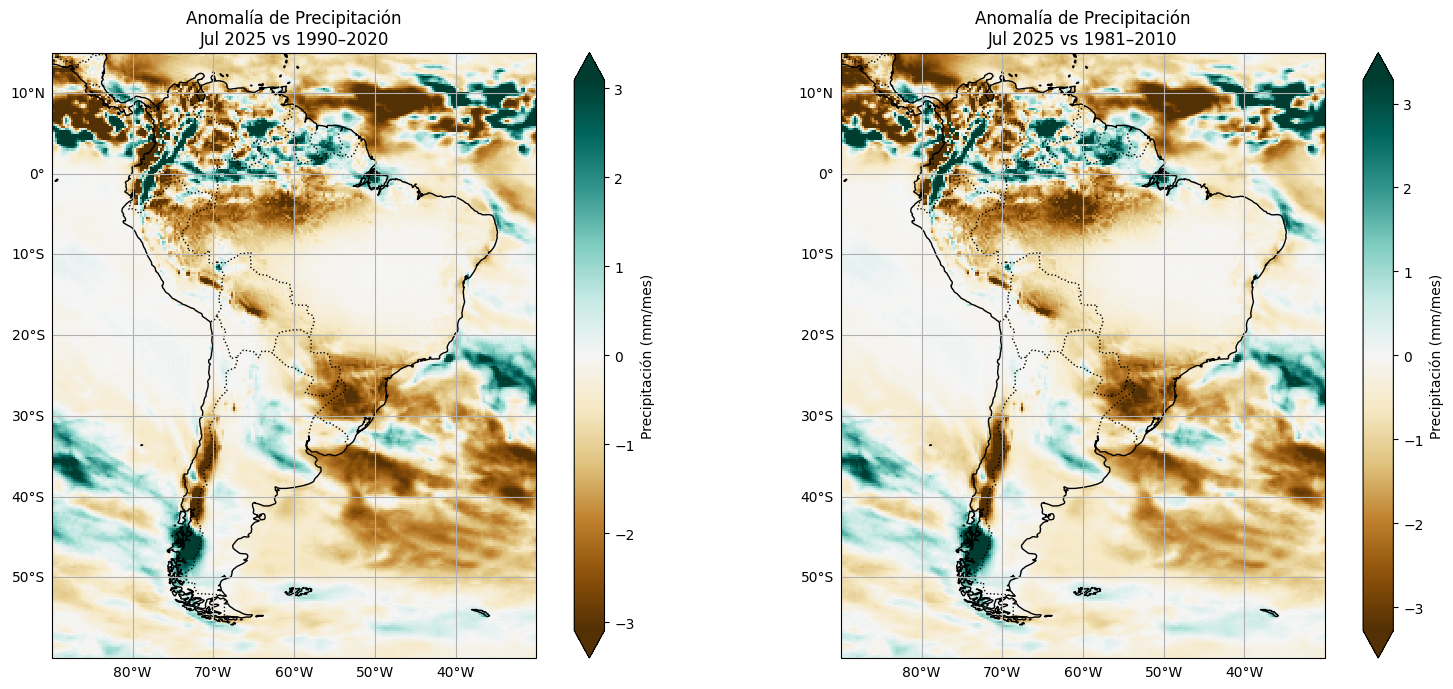

In [27]:
# ============================================
# 1. Instalar dependencias (solo en Colab)
# ============================================
!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
!pip install cartopy xarray zarr fsspec requests

# ============================================
# 2. Importar librerías
# ============================================
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ============================================
# 3. Abrir dataset ERA5 (requiere token en .netrc)
# ============================================
url = "https://data.earthdatahub.destine.eu/era5/reanalysis-era5-single-levels-monthly-means-v0.zarr"

ds = xr.open_dataset(
    url,
    engine="zarr",
    chunks="auto",
    storage_options={"client_kwargs": {"trust_env": True}}
)

# ============================================
# 4. Seleccionar variable (precipitación total) y convertir a mm/mes
# ============================================
tp = ds["tp"] * 1000  # ERA5 entrega en metros → convertir a mm
tp.attrs["units"] = "mm/mes"

# Recorte aproximado Sudamérica
lat_min, lat_max = -60, 15
lon_min, lon_max = 270, 330  # (-90 a -30 en 0–360)
tp_sa = tp.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))

# ============================================
# 5. Extraer Julio 2025
# ============================================
tp_202507 = tp_sa.sel(valid_time="2025-07")

# ============================================
# 6. Calcular climatologías
# ============================================
# 1990–2020
clim_1990_2020 = tp_sa.sel(valid_time=slice("1990-01", "2020-12"))
clim_1990_2020_jul = clim_1990_2020.sel(valid_time=clim_1990_2020["valid_time"].dt.month == 7)
clim_1990_2020_mean = clim_1990_2020_jul.mean("valid_time")

# 1981–2010
clim_1981_2010 = tp_sa.sel(valid_time=slice("1981-01", "2010-12"))
clim_1981_2010_jul = clim_1981_2010.sel(valid_time=clim_1981_2010["valid_time"].dt.month == 7)
clim_1981_2010_mean = clim_1981_2010_jul.mean("valid_time")

# ============================================
# 7. Anomalías (mm/mes)
# ============================================
anom_1990_2020 = tp_202507 - clim_1990_2020_mean
anom_1981_2010 = tp_202507 - clim_1981_2010_mean

# ============================================
# 8. Graficar con Cartopy
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 7),
                         subplot_kw={"projection": ccrs.PlateCarree()})

for ax in axes:
    ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, facecolor="lightgray", alpha=0.4)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False

# Anomalía 1990–2020
anom_1990_2020.plot(
    ax=axes[0], transform=ccrs.PlateCarree(),
    cmap="BrBG", robust=True,
    cbar_kwargs={"label": "Precipitación (mm/mes)"}
)
axes[0].set_title("Anomalía de Precipitación\nJul 2025 vs 1990–2020")

# Anomalía 1981–2010
anom_1981_2010.plot(
    ax=axes[1], transform=ccrs.PlateCarree(),
    cmap="BrBG", robust=True,
    cbar_kwargs={"label": "Precipitación (mm/mes)"}
)
axes[1].set_title("Anomalía de Precipitación\nJul 2025 vs 1981–2010")

plt.tight_layout()
plt.show()


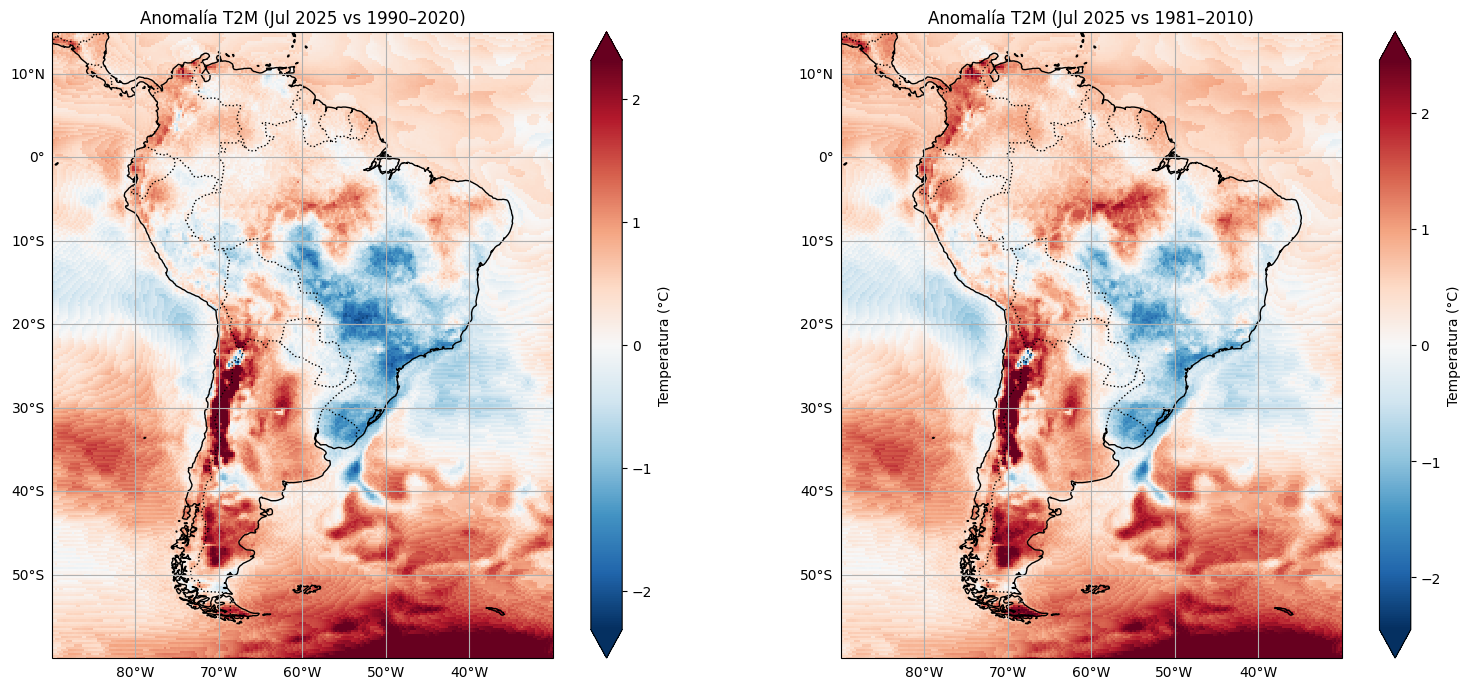

In [28]:
# ============================================
# 1. Seleccionar temperatura a 2m (t2m) y convertir a °C
# ============================================
t2m = ds["t2m"] - 273.15
t2m.attrs["units"] = "°C"

# Recorte Sudamérica
t2m_sa = t2m.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))

# ============================================
# 2. Julio 2025
# ============================================
t2m_202507 = t2m_sa.sel(valid_time="2025-07")

# ============================================
# 3. Climatologías
# ============================================
# 1990–2020
clim_1990_2020 = t2m_sa.sel(valid_time=slice("1990-01", "2020-12"))
clim_1990_2020_jul = clim_1990_2020.sel(valid_time=clim_1990_2020["valid_time"].dt.month == 7)
clim_1990_2020_mean = clim_1990_2020_jul.mean("valid_time")

# 1981–2010
clim_1981_2010 = t2m_sa.sel(valid_time=slice("1981-01", "2010-12"))
clim_1981_2010_jul = clim_1981_2010.sel(valid_time=clim_1981_2010["valid_time"].dt.month == 7)
clim_1981_2010_mean = clim_1981_2010_jul.mean("valid_time")

# ============================================
# 4. Anomalías (°C)
# ============================================
anom_t2m_1990_2020 = t2m_202507 - clim_1990_2020_mean
anom_t2m_1981_2010 = t2m_202507 - clim_1981_2010_mean

# ============================================
# 5. Graficar con Cartopy
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 7),
                         subplot_kw={"projection": ccrs.PlateCarree()})

for ax in axes:
    ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="50m")
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, facecolor="lightgray", alpha=0.4)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False

# Anomalía 1990–2020
anom_t2m_1990_2020.plot(
    ax=axes[0], transform=ccrs.PlateCarree(),
    cmap="RdBu_r", center=0, robust=True,
    cbar_kwargs={"label": "Temperatura (°C)"}
)
axes[0].set_title("Anomalía T2M (Jul 2025 vs 1990–2020)")

# Anomalía 1981–2010
anom_t2m_1981_2010.plot(
    ax=axes[1], transform=ccrs.PlateCarree(),
    cmap="RdBu_r", center=0, robust=True,
    cbar_kwargs={"label": "Temperatura (°C)"}
)
axes[1].set_title("Anomalía T2M (Jul 2025 vs 1981–2010)")

plt.tight_layout()
plt.show()
